<a href="https://colab.research.google.com/github/KendallScott/ML2/blob/main/Scott_Kendall_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 2

This is called DeathToGridSearch because with this example you will never have to think about how to manage a large number of classifiers etc simultaneously.  You will now be able to run and collect results in a very straightforward manner.  #LongLongLiveGridSearch!

In [6]:
import pandas as pd
import os
import numpy as np
#https://github.com/KendallScott/QTW/blob/main/Case%20Study%204/Case_Study_4.ipynb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from numpy import random
from itertools import product
from sklearn.model_selection import StratifiedKFold, cross_val_predict

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset?resource=download

df = pd.read_csv('/content/drive/MyDrive/Employee.csv', encoding = 'ISO-8859-1',low_memory=False)

Mounted at /content/drive


In [3]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
X = df.loc[:,df.columns != 'LeaveOrNot']
y = df['LeaveOrNot'].values.flatten()

In [7]:
df_num = X.select_dtypes(exclude='object')
num_cols = df_num.columns

# impute numeric with median
for i in num_cols:
    df_num[i] = df_num[i].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))
df_num.info()

df_cat = X.select_dtypes(include='object')
cat_cols = df_cat.columns

# scale numerical data
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)

#one hot encode cat data
encoder = OneHotEncoder(sparse_output=False)
df_cat = encoder.fit_transform(df_cat)
X = np.hstack([df_num,df_cat])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                4653 non-null   int64
 1   PaymentTier                4653 non-null   int64
 2   Age                        4653 non-null   int64
 3   ExperienceInCurrentDomain  4653 non-null   int64
dtypes: int64(4)
memory usage: 145.5 KB


In [8]:
education = df[['Education', 'LeaveOrNot','City']].groupby(['Education', 'LeaveOrNot']).count().reset_index()

In [9]:
education

,Education,LeaveOrNot,City
0,Bachelors,0,2472
1,Bachelors,1,1129
2,Masters,0,447
3,Masters,1,426
4,PHD,0,134
5,PHD,1,45


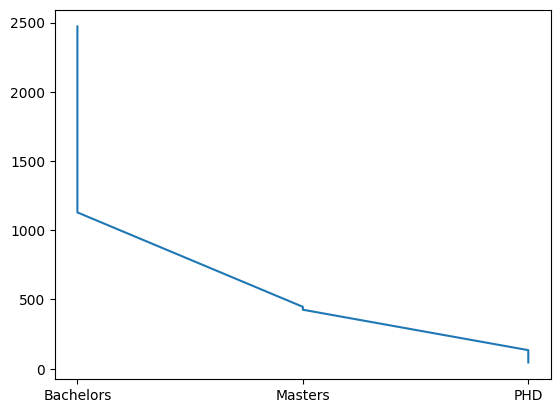

In [10]:
# prompt: create graph of data df using index for date and close on line plot

import matplotlib.pyplot as plt

plt.plot(education['Education'], education['City'], label='LeaveOrNot')

In [123]:
print(model)

LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.0, max_iter=25,
                   penalty='elasticnet', random_state=45, solver='saga')


In [125]:
hyper_dict

{'C': [0.001, 0.1, 0.5, 1],
 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'max_iter': [25, 50, 60, 75, 100]}

In [126]:
{key: [index for index, x in enumerate(hyper_dict) if x == key] for key in hyper_dict}


{'C': [0], 'l1_ratio': [1], 'max_iter': [2]}

In [153]:
 test =[0,1,2,3,4]
np.append(grid_results, test)

array([0., 1., 2., 3., 4.])

In [166]:
test = np.array(test)

In [172]:
np.append(test, test)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [198]:
np.append(grid_results, score)

array([0.66272825, 0.6895811 , 0.69387755, 0.69784946, 0.71075269])

In [190]:
 np.empty(0)

array([], dtype=float64)

In [238]:
import itertools
from itertools import *
from numpy import arange
from sklearn.ensemble import RandomForestClassifier
#reference: https://stackoverflow.com/questions/69300562/how-to-define-the-grid-for-using-grid-search-from-scratch-in-python


def makeGrid(pars_dict):
    keys=pars_dict.keys()
    length = len(keys)
    combinations=itertools.product(*pars_dict.values())
    ds=[dict(zip(keys,cc)) for cc in combinations]
    return ds

model_selection = [0,1]
grid_results = np.empty(0)
model_selection_results = []

def search_results(model, grid):
  for x, i in enumerate(grid):
    model.set_params(**i)
    model.fit(X,y)
    score = cross_val_score(model, X, y, scoring='accuracy', cv=5)
    score=score.mean()
    score=np.ravel(score)
    grid_results_updated = np.insert(grid_results,[0], score)
    return (i, score.mean())
    return grid_results_updated
    print (grid_results_updated)
    if max(grid_results) == score.mean():
        print('best model & params: ', model)
        best_model = model
        return best_model
        return grid_results_updated


#creating different params for different models in loop
for x,i in enumerate(model_selection):
    print(x)
    model_selection = []
    if x==0:
      model=LogisticRegression(random_state=45,penalty='elasticnet',class_weight='balanced',solver='saga')
      l1 = arange(0, 1, 0.1)
      C = [  0.001,  0.1,  0.5, 1]
      max_iter = [25,  50, 60, 75, 100]
      hyper_dict = {'C': C, 'l1_ratio': l1, 'max_iter':max_iter}
      grid = makeGrid(hyper_dict)
      search_results(model, grid)
      model_selection_results.append(search_results(model, grid))

    if x==1:
      n_estimators = [50, 100, 200]
      max_features = ['sqrt','log2',20]
      hyper_dict = {'n_estimators': n_estimators, 'max_features': max_features}
      model = RandomForestClassifier(criterion='gini',class_weight='balanced')
      grid = makeGrid(hyper_dict)
      search_results(model, grid)
      model_selection_results.append(search_results(model, grid))


0
1


In [239]:
model_selection_results

[({'C': 0.001, 'l1_ratio': 0.0, 'max_iter': 25}, 0.6873042052134946),
 ({'n_estimators': 50, 'max_features': 'sqrt'}, 0.8233389926428977)]

In [225]:
results = search_results(model, grid)
results

({'n_estimators': 50, 'max_features': 'sqrt'}, 0.826346280447663)

In [227]:
n_estimators = [50, 100, 200]
max_features = ['sqrt','log2',20]
hyper_dict = {'n_estimators': n_estimators, 'max_features': max_features}
model = RandomForestClassifier(criterion='gini',class_weight='balanced')
grid = makeGrid(hyper_dict)
search_results(model, grid)

({'n_estimators': 50, 'max_features': 'sqrt'}, 0.8239806890498134)

In [226]:
model=LogisticRegression(random_state=45,penalty='elasticnet',class_weight='balanced',solver='saga')
l1 = arange(0, 1, 0.1)
C = [  0.001,  0.1,  0.5, 1]
max_iter = [25,  50, 60, 75, 100]
hyper_dict = {'C': C, 'l1_ratio': l1, 'max_iter':max_iter}
grid = makeGrid(hyper_dict)
search_results(model, grid)

({'C': 0.001, 'l1_ratio': 0.0, 'max_iter': 25}, 0.6873042052134946)

In [142]:
best_model

NameError: ignored

In [134]:
grid_results

[0.6873042052134946, 0.8203284709469527]

In [ ]:
# Homework 2
import numpy as np
from sklearn.metrics import accuracy_score # other metrics too pls!
from sklearn.ensemble import RandomForestClassifier # more!
from sklearn.model_selection import KFold

# adapt this code below to run your analysis
# 1. Write a function to take a list or dictionary of clfs and hypers(i.e. use logistic regression), each with 3 different sets of hyper parameters for each
# 2. Expand to include larger number of classifiers and hyperparameter settings
# 3. Find some simple data
# 4. generate matplotlib plots that will assist in identifying the optimal clf and parampters settings
# 5. Please set up your code to be run and save the results to the directory that its executed from
# 6. Investigate grid search function

M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
L = np.ones(M.shape[0])
n_folds = 5

data = (M, L, n_folds)

def run (a_clf, data, clf_hyper={}):
  M, L, n_folds = data # unpack data container
  kf = KFold(n_splits=n_folds) # Establish the cross validation
  ret = {} # classic explication of results

  for ids, (train_index, test_index) in enumerate(kf.split(M, L)):
    clf = a_clf(**clf_hyper) # unpack parameters into clf if they exist
    clf.fit(M[train_index], L[train_index])
    pred = clf.predict(M[test_index])
    ret[ids]= {'clf': clf,
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}
  return ret



In [ ]:
results = run (RandomForestClassifier, data, clf_hyper={})

In [ ]:
results